### Linear Regression

Training a linear regression model means estimating a set of weights (one weight per feature, plus an extra weight called the bias or the intercept) on a dataset called the training set.

The model estimated is a linear model taking the form:

target_feature=w0+w1∗feature1+w2∗feature2+...+wn∗featurentarget_feature=w0+w1∗feature1+w2∗feature2+...+wn∗featuren 
The learned model can be used to predict the target feature for new examples where we know the descriptive features, but not the target feature. This is called the test example or the test data. In this notebook we will see the difference between evaluating the model on the training data and measuring the model error (in-sample error) versus evaluating the model on the test data and measuring that error (out-of-sample error).

In [1]:
#importing required libraries and packages
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
import scipy

/Users/Tejaswis/anaconda3/envs/comp47350py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 1. Data preparation

In [2]:
# df is created from original dataset
# replaced by cleaned version once quality plan is complete
#df = pd.read_csv('OnlineNewsPopularityCleaned.csv', skipinitialspace=True)
df = pd.read_csv('OnlineNewsPopularityCleaned.csv', skipinitialspace=True)
pd.options.display.max_columns = None
pd.options.display.max_rows = None


In [3]:
#Print (rows, columns)
df.head(3)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500


Calculated the Information Gain for each attribute with respect to a class in a (sparse) document-term matrix. The Information Gain is defined as H(Class) - H(Class | Attribute), where H is the entropy. 

In [4]:
df1 = df.drop('shares', axis=1)
df2 = df1.drop('url', axis=1)

In [5]:
df3=scipy.sparse.csr_matrix(df2.values)

In [6]:
y=df.as_matrix(columns=['shares'])

In [7]:
col=list(df2.columns.values)

In [8]:
#this will output a dictionary of each attribute, i.e. item in the vocabulary as keys and their information gain as values
import sklearn
res = dict(zip(col,
               sklearn.feature_selection.mutual_info_classif(df3, y, discrete_features=True)
               ))

/Users/Tejaswis/anaconda3/envs/comp47350py36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'LDA_00': 5.3683915362330374,
 'LDA_01': 5.3523199569360722,
 'LDA_02': 5.3781644224537075,
 'LDA_03': 5.3462810765221249,
 'LDA_04': 5.3710643647200067,
 'abs_title_sentiment_polarity': 0.50702816220588831,
 'abs_title_subjectivity': 0.43979556291202926,
 'average_token_length': 4.862218222274274,
 'avg_negative_polarity': 3.2184776499478405,
 'avg_positive_polarity': 4.550486467232763,
 'data_channel_is_bus': 0.019734703530144952,
 'data_channel_is_entertainment': 0.028221257938357381,
 'data_channel_is_lifestyle': 0.016517076680820295,
 'data_channel_is_socmed': 0.021559352173343017,
 'data_channel_is_tech': 0.025760582972089992,
 'data_channel_is_world': 0.033772286388906787,
 'global_rate_negative_words': 3.2334070871857832,
 'global_rate_positive_words': 3.6223875279391913,
 'global_sentiment_polarity': 5.0554207505644913,
 'global_subjectivity': 5.0455606551707159,
 'is_weekend': 0.033357583699486673,
 'kw_avg_avg': 5.3674749949656313,
 'kw_avg_max': 5.0014755022737392,
 'kw_avg_min': 4.1477465186447944,
 'kw_max_avg': 4.2258022861775739,
 'kw_max_max': 0.099661120751210974,
 'kw_max_min': 1.6862121516285513,
 'kw_min_avg': 2.7190278778614578,
 'kw_min_max': 0.99983234514130503,
 'kw_min_min': 0.053593571044521754,
 'max_negative_polarity': 0.25845928194887174,
 'max_positive_polarity': 0.17879915239025657,
 'min_negative_polarity': 0.28497092261873314,
 'min_positive_polarity': 0.18594115670637662,
 'n_non_stop_unique_tokens': 4.5355325459776816,
 'n_non_stop_words': 1.8600226943587341,
 'n_tokens_content': 2.2139975492463311,
 'n_tokens_title': 0.16149333202589627,
 'n_unique_tokens': 4.7738715496223669,
 'num_hrefs': 0.42329342722289792,
 'num_imgs': 0.28439453282237359,
 'num_keywords': 0.12456877659897686,
 'num_self_hrefs': 0.19677041286643404,
 'num_videos': 0.14253212459190581,
 'rate_negative_words': 1.5064827587538716,
 'rate_positive_words': 1.5158634846150842,
 'self_reference_avg_sharess': 2.2845925840343497,
 'self_reference_max_shares': 1.2087976581423132,
 'self_reference_min_shares': 1.3049492964946465,
 'timedelta': 1.7723839453974395,
 'title_sentiment_polarity': 0.6089786677705652,
 'title_subjectivity': 0.5472633834302385,
 'weekday_is_friday': 0.018957945216486138,
 'weekday_is_monday': 0.019821589042664917,
 'weekday_is_saturday': 0.022387405911094269,
 'weekday_is_sunday': 0.020253328014658761,
 'weekday_is_thursday': 0.01962792154740356,
 'weekday_is_tuesday': 0.020586316422148067,
 'weekday_is_wednesday': 0.020629877393717369}

### - Check how many rows and columns your CSV has.

We have a 39644 articles in our dataframe, with 33 features associated with each individual article.

### - Print the first and the last 5 rows.

In [9]:
df.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [10]:
df.tail(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
38458,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.5,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
38459,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,616.0,184.000,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830,2100.0,2100.0,2100.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.029349,0.028575,0.231866,0.681635,0.028575,0.564374,0.194249,0.039634,0.009146,0.812500,0.187500,0.374825,0.136364,0.70,-0.211111,-0.4,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
38460,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,8.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,691.0,168.250,6200.0,843300.0,295850.000000,1753.882353,6880.687034,4206.439195,1400.0,1400.0,1400.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.159004,0.025025,0.025207,0.643794,0.146970,0.510296,0.024609,0.033937,0.024887,0.576923,0.423077,0.307273,0.136364,0.50,-0.356439,-0.8,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
38461,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,5.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,-1.000,0.0,843300.0,254600.000000,0.000000,3384.316871,1777.895883,452.0,452.0,452.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.040004,0.040003,0.839987,0.040002,0.040004,0.358578,-0.008066,0.020528,0.023460,0.466667,0.533333,0.236851,0.062500,0.50,-0.205246,-0.5,-0.012500,0.000000,0.000000,0.500000,0.000000,1100
38462,http://mashable.com/2014/12/27/youtube-channel...,8.0,10.0,157.0,0.701987,1.0,0.846154,1.0,1.0,0.0,2.0,4.471338,4.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,97.0,23.500,205600.0,843300.0,366200.000000,3035.080555,3613.512953,3296.909481,2100.0,2100.0,2100.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.050001,0.799339,0.050000,0.050659,0.050001,0.517893,0.104892,0.063694,0.012739,0.833333,0.166667,0.247338,0.100000,0.50,-0.200000,-0.2,-0.200000,0.333333,0.250000,0.166667,0.250000,1300


### - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as continuous and which ones as categorical types). 

In [11]:
df.dtypes

url                               object
timedelta                        float64
n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max      

In [12]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [13]:
# check for duplicate rows
print('Duplicate rows:', df.duplicated()[df.duplicated() == True].shape[0])

Duplicate rows: 0


In [14]:
# Check for duplicate columns
print('Duplicate columns:',df.columns.size - df.columns.unique().size)

Duplicate columns: 0


In [15]:
df.shape

(38463, 61)

In [16]:
df = df.drop(['url'], axis=1)

In [17]:
df_shuffle=shuffle(df)
df_shuffle.head(3)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
8543,568.0,7.0,215.0,0.674528,1.0,0.826087,4.0,3.0,0.0,1.0,5.065116,6.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,938.0,363.833333,938.0,690400.0,137023.000000,938.0,3278.649419,2279.969247,997.0,6800.0,3898.500000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.034037,0.033400,0.865481,0.033746,0.033335,0.464556,0.113149,0.051163,0.013953,0.785714,0.214286,0.383117,0.2,0.90,-0.508333,-0.875,-0.25,0.950000,0.3,0.450000,0.3,1900
13479,470.0,10.0,183.0,0.548023,1.0,0.563910,9.0,4.0,12.0,0.0,4.950820,7.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1000.0,354.666667,0.0,843300.0,317042.857143,0.0,32180.000000,8511.344229,3900.0,3900.0,3900.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.513509,0.028572,0.400774,0.028572,0.644444,0.233333,0.027322,0.005464,0.833333,0.166667,0.520000,0.1,0.80,-0.600000,-0.600,-0.60,0.666667,-0.7,0.166667,0.7,25100
17500,388.0,7.0,193.0,0.610169,1.0,0.786408,6.0,4.0,1.0,0.0,4.331606,7.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,531.0,210.000000,0.0,843300.0,198885.714286,0.0,3470.212122,2329.799441,1800.0,3500.0,2366.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028576,0.399074,0.028575,0.028574,0.515201,0.353704,0.072222,0.020725,0.010363,0.666667,0.333333,0.237500,0.1,0.35,-0.150000,-0.200,-0.10,0.000000,0.0,0.500000,0.0,939


In [18]:
#70% of data value is being saved in variable a
a=int(df_shuffle.shape[0]*0.7)
a

26924

In [19]:
#70% of data value is being saved in variable b
b=df_shuffle.shape[0]-int(df_shuffle.shape[0]*0.7)
b

11539

In [20]:
df_train=df_shuffle.head(a)

In [21]:
df_test=df_shuffle.head(b)

In [22]:
df_train.head(10)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
8543,568.0,7.0,215.0,0.674528,1.0,0.826087,4.0,3.0,0.0,1.0,5.065116,6.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,938.0,363.833333,938.0,690400.0,137023.000000,938.000000,3278.649419,2279.969247,997.0,6800.0,3898.500000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.034037,0.033400,0.865481,0.033746,0.033335,0.464556,0.113149,0.051163,0.013953,0.785714,0.214286,0.383117,0.200000,0.90,-0.508333,-0.875,-0.250,0.950000,0.300000,0.450000,0.300000,1900
13479,470.0,10.0,183.0,0.548023,1.0,0.563910,9.0,4.0,12.0,0.0,4.950820,7.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1000.0,354.666667,0.0,843300.0,317042.857143,0.000000,32180.000000,8511.344229,3900.0,3900.0,3900.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.513509,0.028572,0.400774,0.028572,0.644444,0.233333,0.027322,0.005464,0.833333,0.166667,0.520000,0.100000,0.80,-0.600000,-0.600,-0.600,0.666667,-0.700000,0.166667,0.700000,25100
17500,388.0,7.0,193.0,0.610169,1.0,0.786408,6.0,4.0,1.0,0.0,4.331606,7.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,531.0,210.000000,0.0,843300.0,198885.714286,0.000000,3470.212122,2329.799441,1800.0,3500.0,2366.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028576,0.399074,0.028575,0.028574,0.515201,0.353704,0.072222,0.020725,0.010363,0.666667,0.333333,0.237500,0.100000,0.35,-0.150000,-0.200,-0.100,0.000000,0.000000,0.500000,0.000000,939
1445,707.0,10.0,490.0,0.565574,1.0,0.719472,11.0,8.0,1.0,0.0,4.700000,7.0,0.0,1.0,0.0,0.0,0.0,0.0,217.0,792.0,401.000000,0.0,69100.0,27742.857143,0.000000,3809.000000,2050.220649,294.0,26600.0,7448.500000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.456845,0.300320,0.184892,0.029371,0.028572,0.546276,0.168970,0.059184,0.020408,0.743590,0.256410,0.384834,0.100000,1.00,-0.339444,-0.800,-0.050,0.000000,-0.200000,0.500000,0.200000,380
14432,451.0,9.0,597.0,0.516295,1.0,0.696275,10.0,10.0,1.0,0.0,4.452261,8.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,531.0,209.166667,0.0,843300.0,166850.000000,0.000000,3262.749031,1863.753086,527.0,7900.0,2603.857143,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025048,0.025261,0.025002,0.025002,0.899687,0.450707,0.173421,0.050251,0.010050,0.833333,0.166667,0.364432,0.050000,0.80,-0.244444,-0.700,-0.050,0.900000,0.400000,0.400000,0.400000,1600
2315,692.0,10.0,172.0,0.691860,1.0,0.782609,4.0,3.0,1.0,0.0,4.895349,7.0,0.0,0.0,0.0,1.0,0.0,0.0,217.0,1300.0,629.857143,3600.0,69100.0,29428.571429,2321.806452,5850.000000,3304.554875,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.884956,0.028617,0.028650,0.028755,0.029021,0.331818,0.173414,0.081395,0.000000,1.000000,0.000000,0.198187,0.033333,0.50,0.000000,0.000,0.000,0.066667,0.033333,0.433333,0.033333,4800
34892,71.0,13.0,401.0,0.555276,1.0,0.758929,2.0,1.0,1.0,2.0,4.917706,7.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,973.0,365.666667,0.0,843300.0,172928.571429,0.000000,3446.075532,2308.316202,672.0,672.0,672.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.028574,0.028648,0.212360,0.028618,0.701800,0.566074,0.092315,0.032419,0.022444,0.590909,0.409091,0.485897,0.100000,1.00,-0.355247,-0.900,-0.100,0.000000,0.000000,0.50

# 2. Data Understanding

In [23]:
# Look at correlations for all the continuous features.
df_train[[ 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords','kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess','is_weekend','LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity','shares']].corr()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
n_tokens_title,1.000000,0.028280,-0.029263,0.041012,-0.015051,-0.043649,-0.005996,-0.007268,0.051164,-0.093870,-0.007488,-0.112541,-0.002136,-0.027115,0.006235,0.121918,0.109477,-0.010291,0.006062,-0.004372,-0.007808,0.002841,-0.000502,-0.005146,-0.067424,0.071458,0.041835,0.029754,-0.062679,-0.034602,-0.065680,-0.049815,0.027648,-0.050644,0.051116,-0.030449,-0.016674,0.001460,-0.038836,-0.048711,0.001335,0.078368,0.000417,-0.147413,0.041677,0.008504
n_tokens_content,0.028280,1.000000,-0.749123,0.602168,-0.598760,0.401949,0.280629,0.356836,0.091060,-0.075113,0.083737,-0.060854,-0.000712,-0.007730,-0.015134,0.066336,-0.071080,-0.011593,-0.016815,-0.052799,-0.034876,0.014377,-0.022491,0.057942,0.008955,-0.011254,0.082935,-0.109217,0.028565,-0.007258,-0.015706,0.059788,0.070234,-0.032641,0.033180,0.021020,-0.322548,0.368636,-0.058020,-0.411145,0.279716,0.008522,0.021192,0.000676,0.016359,0.008329
n_unique_tokens,-0.029263,-0.749123,1.000000,-0.796783,0.885045,-0.310063,-0.211938,-0.338456,0.017747,0.064430,-0.085764,0.069107,0.002493,0.005511,0.032345,-0.071861,0.107729,0.038102,0.033599,0.093021,0.029140,-0.001108,0.022956,-0.039730,-0.022542,0.071730,-0.119650,0.181505,-0.098175,0.060102,0.027271,0.032549,-0.003478,0.025522,-0.026734,0.032428,0.343737,-0.321143,0.015049,0.329902,-0.281308,0.019481,-0.022035,-0.019746,0.002504,0.008947
n_non_stop_words,0.041012,0.602168,-0.796783,1.000000,-0.643430,0.328979,0.184969,0.232629,0.075214,0.055740,0.066055,-0.081597,0.003283,-0.005264,-0.023035,0.088380,-0.060310,-0.047731,-0.018059,-0.076915,-0.031869,0.014434,-0.015931,0.027107,0.007863,-0.064263,0.146573,-0.119843,0.018332,-0.051971,-0.072400,-0.081270,0.037051,-0.079754,0.082476,-0.015478,-0.401602,0.354628,-0.097138,-0.388253,0.274645,-0.022805,0.011152,0.039411,-0.002999,-0.008098
n_non_stop_unique_tokens,-0.015051,-0.598760,0.885045,-0.643430,1.000000,-0.368291,-0.215694,-0.474447,-0.002521,-0.075599,-0.098355,0.060687,0.001160,0.005574,0.018068,-0.063001,0.062117,-0.010152,-0.005591,0.000857,0.016017,-0.010879,0.007552,-0.047309,0.039593,0.060788,-0.053207,0.020990,-0.051262,0.023348,0.005583,0.068959,0.026110,0.015859,-0.016814,0.004779,0.219979,-0.241413,0.014766,0.223977,-0.180954,-0.011015,-0.037796,-0.000294,-0.026441,-0.007755
num_hrefs,-0.043649,0.401949,-0.310063,0.328979,-0.368291,1.000000,0.370461,0.359579,0.111495,0.195372,0.131867,-0.048314,0.007827,0.002160,-0.008703,0.059063,0.007334,0.071480,0.078186,0.149570,-0.010530,0.071620,0.016692,0.078670,-0.039031,-0.055854,-0.015214,0.165527,-0.072360,0.121901,0.050230,-0.017535,-0.011707,-0.008939,0.009258,0.111676,-0.122964,0.232389,-0.100239,-0.225864,0.093415,0.046206,0.040560,0.005856,0.061256,0.054677
num_self_hrefs,-0.005996,0.280629,-0.211938,0.184969,-0.215694,0.370461,1.000000,0.247121,0.073228,-0.042657,0.114689,-0.016293,-0.002288,-0.003157,-0.023011,0.005752,-0.048540,0.052453,-0.002995,0.005350,-0.038392,0.123516,0.014313,0.053136,-0.038930,-0.007310,-0.087766,-0.005009,0.131345,0.019443,0.060173,0.069637,-0.030706,0.063628,-0.063489,0.009607,-0.112740,0.134700,-0.003605,-0.079440,0.074822,-0.006444,0.030517,0.003633,-0.002961,0.005305
num_imgs,-0.007268,0.356836,-0.338456,0.232629,-0.474447,0.359579,

In [24]:
# Look at correlations for all the selected continuous features.
df_train[[ 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'shares']].corr()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,shares
n_tokens_title,1.000000,0.028280,-0.029263,0.041012,-0.015051,-0.043649,-0.005996,-0.007268,0.008504
n_tokens_content,0.028280,1.000000,-0.749123,0.602168,-0.598760,0.401949,0.280629,0.356836,0.008329
n_unique_tokens,-0.029263,-0.749123,1.000000,-0.796783,0.885045,-0.310063,-0.211938,-0.338456,0.008947
n_non_stop_words,0.041012,0.602168,-0.796783,1.000000,-0.643430,0.328979,0.184969,0.232629,-0.008098
n_non_stop_unique_tokens,-0.015051,-0.598760,0.885045,-0.643430,1.000000,-0.368291,-0.215694,-0.474447,-0.007755
num_hrefs,-0.043649,0.401949,-0.310063,0.328979,-0.368291,1.000000,0.370461,0.359579,0.054677
num_self_hrefs,-0.005996,0.280629,-0.211938,0.184969,-0.215694,0.370461,1.000000,0.247121,0.005305
num_imgs,-0.007268,0.356836,-0.338456,0.232629,-0.474447,0.359579,0.247121,1.000000,0.042099
shares,0.008504,0.008329,0.008947,-0.008098,-0.007755,0.054677,0.005305,0.042099,1.000000


### Scatterplots for each continuos feature and target feature

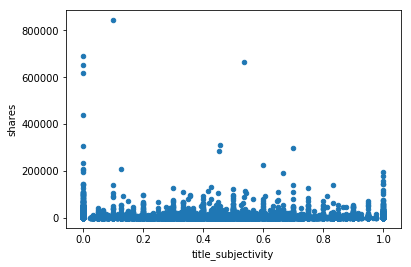

In [25]:
plt.figure()

df.plot(kind='scatter', x='title_subjectivity', y='shares')

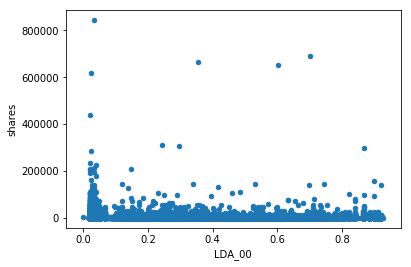

In [969]:
df.plot(kind='scatter', x='LDA_00', y='shares')

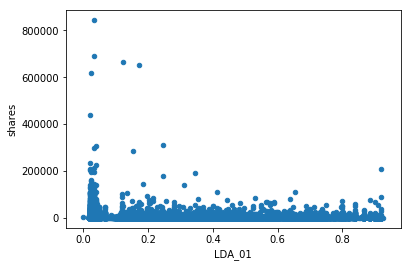

In [970]:
df.plot(kind='scatter', x='LDA_01', y='shares')

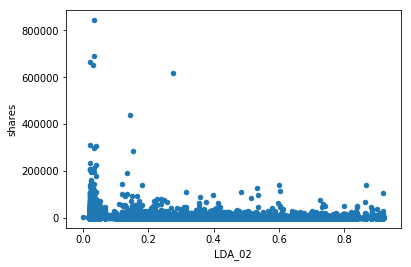

In [971]:
df.plot(kind='scatter', x='LDA_02', y='shares')

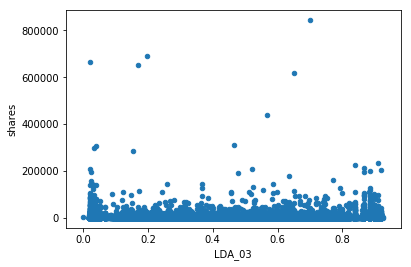

In [972]:
df.plot(kind='scatter', x='LDA_03', y='shares')

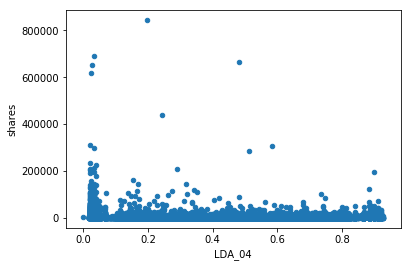

In [973]:
df.plot(kind='scatter', x='LDA_04', y='shares')

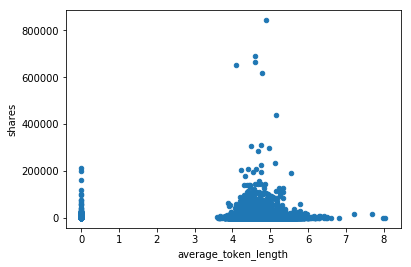

In [974]:
df.plot(kind='scatter', x='average_token_length', y='shares')

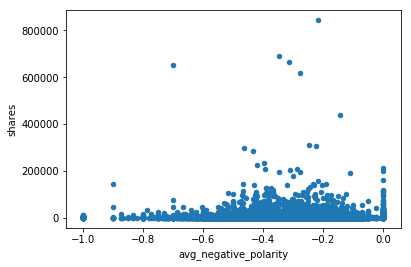

In [975]:
df.plot(kind='scatter', x='avg_negative_polarity', y='shares')

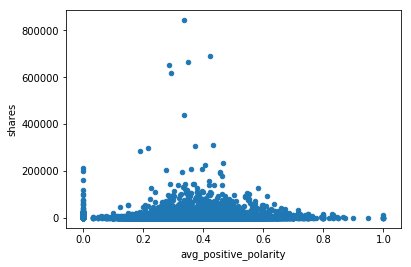

In [976]:
df.plot(kind='scatter', x='avg_positive_polarity', y='shares')

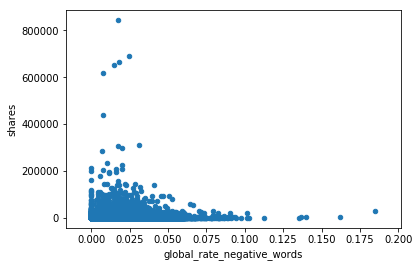

In [977]:
df.plot(kind='scatter', x='global_rate_negative_words', y='shares')

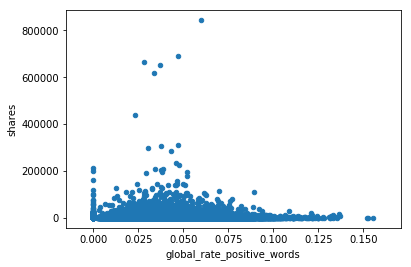

In [978]:
df.plot(kind='scatter', x='global_rate_positive_words', y='shares')

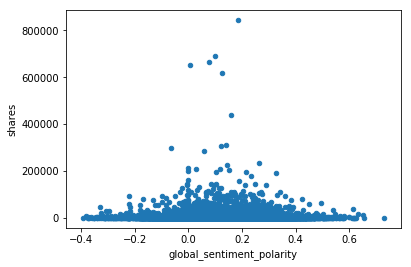

In [979]:
df.plot(kind='scatter', x='global_sentiment_polarity', y='shares')

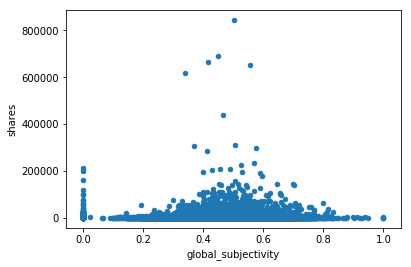

In [980]:
df.plot(kind='scatter', x='global_subjectivity', y='shares')

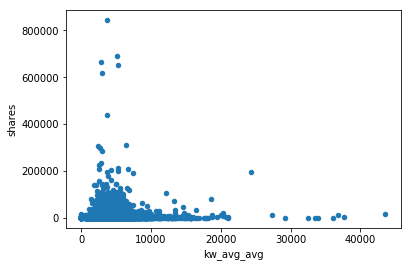

In [981]:
df.plot(kind='scatter', x='kw_avg_avg', y='shares')

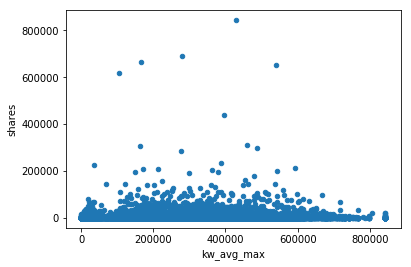

In [982]:
df.plot(kind='scatter', x='kw_avg_max', y='shares')

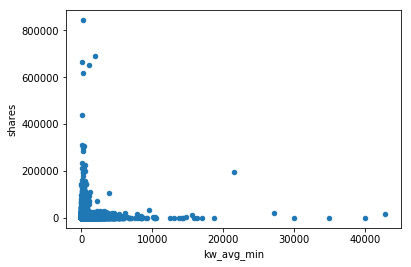

In [983]:
df.plot(kind='scatter', x='kw_avg_min', y='shares')

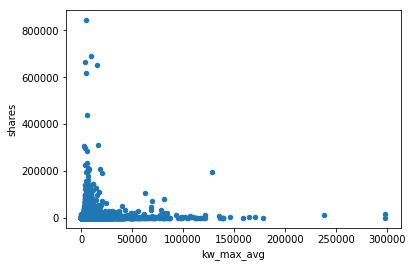

In [984]:
df.plot(kind='scatter', x='kw_max_avg', y='shares')

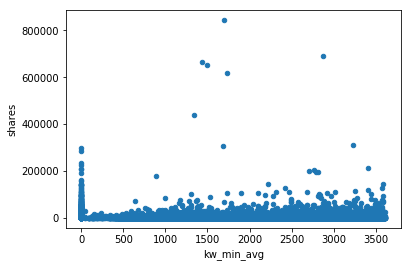

In [772]:
df.plot(kind='scatter', x='kw_min_avg', y='shares')

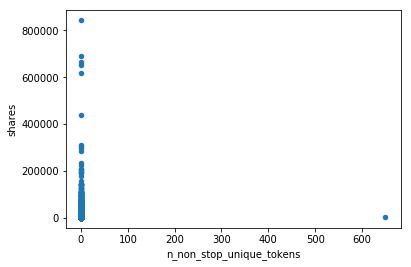

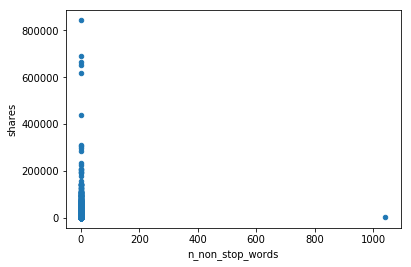

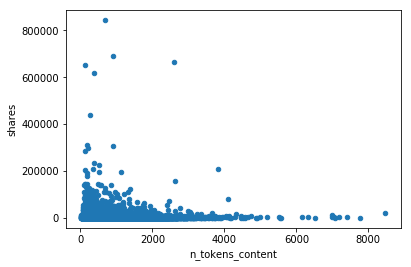

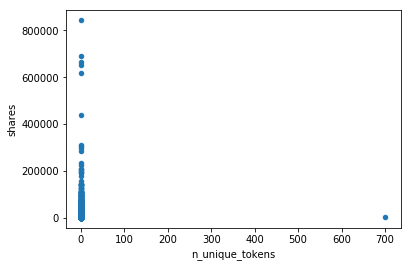

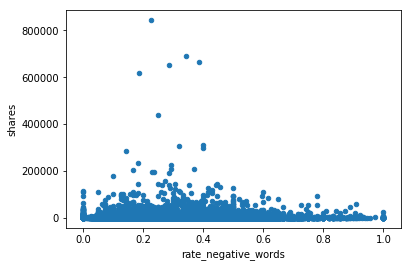

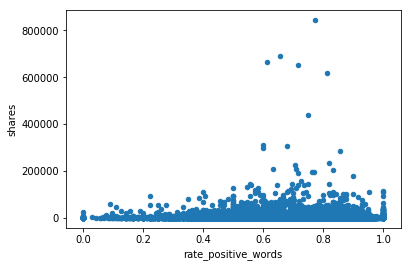

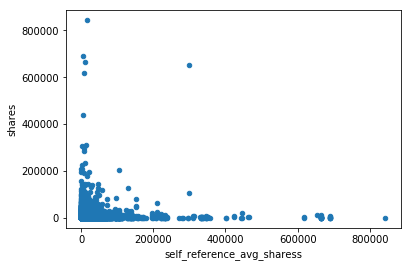

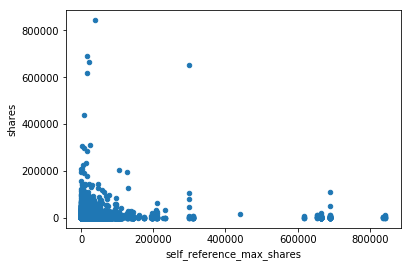

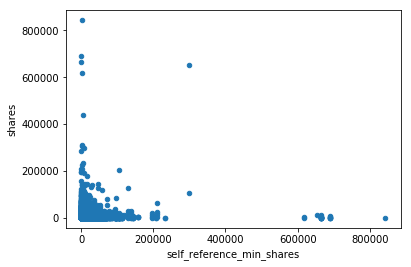

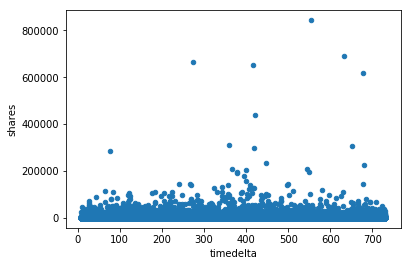

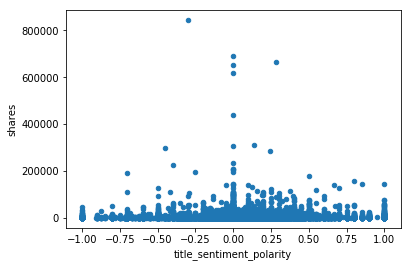

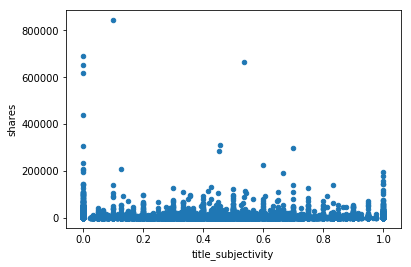

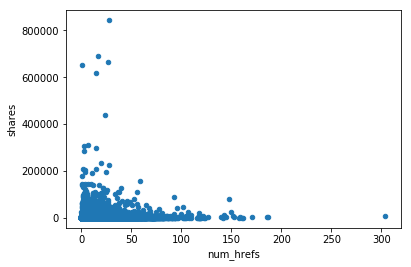

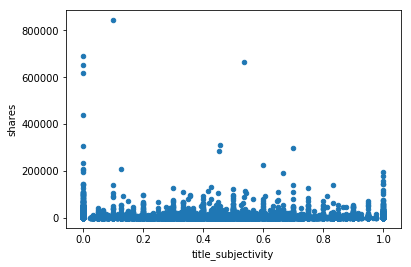

In [26]:
df.plot(kind='scatter', x='n_non_stop_unique_tokens', y='shares')
df.plot(kind='scatter', x='n_non_stop_words', y='shares')
df.plot(kind='scatter', x='n_tokens_content', y='shares')
df.plot(kind='scatter', x='n_unique_tokens', y='shares')
df.plot(kind='scatter', x='rate_negative_words', y='shares')
df.plot(kind='scatter', x='rate_positive_words', y='shares')
df.plot(kind='scatter', x='self_reference_avg_sharess', y='shares')
df.plot(kind='scatter', x='self_reference_max_shares', y='shares')
df.plot(kind='scatter', x='self_reference_min_shares', y='shares')
df.plot(kind='scatter', x='timedelta', y='shares')
df.plot(kind='scatter', x='title_sentiment_polarity', y='shares')
df.plot(kind='scatter', x='title_subjectivity', y='shares')
df.plot(kind='scatter', x='num_hrefs', y='shares')
df.plot(kind='scatter', x='title_subjectivity', y='shares')

# 3. Evaluating Data using Linear Regression

## 3.a. Single feature



### Training a model

In [36]:
#Import statsmodels package for training a linear regression model.
import statsmodels.formula.api as sm

# The formula specifies the target feature and the descriptive features used for training the linear regression model.
# We first train a simple linear regression with only one descriptive feature.
# For training the model we call the method fit() on the given data stored in our df dataframe.
lm_1 = sm.ols(formula="shares ~ average_token_length", data=df).fit()
# Print the model weights/parameters
print(lm.params)

Intercept    3373.627777
LDA_00        -97.097783
dtype: float64


### Testing the model

In [37]:
# The model learned now, We can use the learned model to predict the RentalPrice for a new office Size.
# The Statsmodels predict() method expects a dataframe object.
# Create a new dataframe with a new test example. 
X_new = pd.DataFrame({'average_token_length': [27751]})
X_new.head()

,average_token_length
0,27751


In [44]:
# Predict the shares using the trained model. 

lm_1.predict(X_new)

0   -1.213207e+07
dtype: float64

In [45]:
# We can plot the regression line that was estimated from our trainign set.
# First we use the trained model to predict prices for the min and max Size in our dataset.
X_minmax = pd.DataFrame({'average_token_length': [df.average_token_length.min(), df.average_token_length.max()]})
X_minmax.head()


,average_token_length
0,3.600000
1,8.041534


In [46]:
# Make predictions for the min and max Size values and store them.
predictions = lm_1.predict(X_minmax)
predictions

0    3831.172467
1    1888.576342
dtype: float64

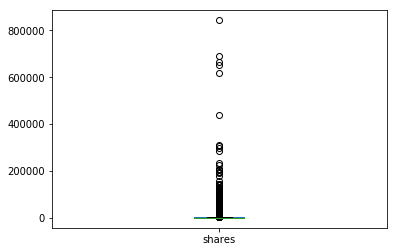

In [47]:
# First, plot the observed data
df.plot(kind='box', x='average_token_length', y='shares')

# Next, plot the regression line, in red.
plt.plot(X_minmax, predictions, c='red', linewidth=2)

In [48]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.397
Date:                Mon, 30 Apr 2018   Prob (F-statistic):             0.0360
Time:                        11:40:12   Log-Likelihood:            -4.1449e+05
No. Observations:               38463   AIC:                         8.290e+05
Df Residuals:                   38461   BIC:                         8.290e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5405.7066 

### Training the model with LDA_00


In [49]:
#Import statsmodels package for training a linear regression model.
import statsmodels.formula.api as sm

# The formula specifies the target feature and the descriptive features used for training the 
# linear regression model.
# We first train a simple linear regression with only one descriptive feature.
# For training the model we call the method fit() on the given data stored in our df dataframe.
lm = sm.ols(formula="shares ~ LDA_00", data=df).fit()
# Print the model weights/parameters
print(lm.params)

Intercept    3373.627777
LDA_00        -97.097783
dtype: float64


### Testing the model

In [50]:
# We can use the learned model to predict the RentalPrice for a new office Size.

# The Statsmodels predict() method expects a dataframe object.
# Create a new dataframe with a new test example. 
X_new = pd.DataFrame({'LDA_00': [27751]})
X_new.head()

,LDA_00
0,27751


In [51]:
# Predict the target shares, using the trained model. 

lm.predict(X_new)

0   -2.691187e+06
dtype: float64

In [52]:
# We can plot the regression line that was estimated from our trainign set.
# First we use the trained model to predict prices for the min and max Size in our dataset.
X_minmax = pd.DataFrame({'LDA_00': [df.LDA_00.min(), df.LDA_00.max()]})
X_minmax.head()


,LDA_00
0,0.000000
1,0.926994


In [53]:
# Make predictions for the min and max Size values and store them.
predictions = lm.predict(X_minmax)
predictions

0    3373.627777
1    3283.618677
dtype: float64

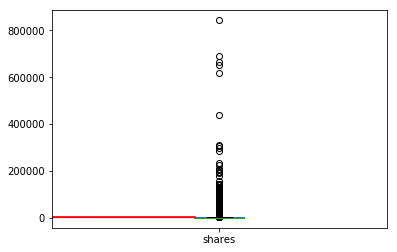

In [54]:
# First, plot the observed data
df.plot(kind='box', x='LDA_00', y='shares')

# Next, plot the regression line, in red.
plt.plot(X_minmax, predictions, c='red', linewidth=2)

In [55]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1905
Date:                Mon, 30 Apr 2018   Prob (F-statistic):              0.663
Time:                        11:42:33   Log-Likelihood:            -4.1450e+05
No. Observations:               38463   AIC:                         8.290e+05
Df Residuals:                   38461   BIC:                         8.290e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3373.6278     72.401     46.597      0.0

The R-squared value is the percentage of the response variable variation that is explained by a linear model.If we observe the above values, the r-squared and p values are zero. This indicates that the model explains none of the variability of the response data around its mean. The single feature model probably appears to have a very low predictive value.

Now, lets evaluate the quality of the model on all the features

## 3.b. All the features

### Training the model with all features


In [56]:
#Import statsmodels package for training a linear regression model.
import statsmodels.formula.api as sm

# The formula specifies the target feature and the descriptive features used for training the 
# linear regression model.
# We first train a simple linear regression with only one descriptive feature (Size).
# For training the model we call the method fit() on the given data stored in our df dataframe.
lm_a = sm.ols(formula="shares ~ n_tokens_title+n_tokens_content+n_unique_tokens+n_non_stop_words+n_non_stop_unique_tokens+num_hrefs+num_self_hrefs+num_imgs+num_videos+average_token_length+num_keywords+data_channel_is_lifestyle+data_channel_is_entertainment+data_channel_is_bus+data_channel_is_socmed+data_channel_is_tech+data_channel_is_world+kw_min_min+kw_max_min+kw_avg_min+kw_min_max+kw_max_max+kw_avg_max+kw_min_avg+kw_max_avg+kw_avg_avg+self_reference_min_shares+self_reference_max_shares+self_reference_avg_sharess+weekday_is_monday+weekday_is_tuesday+weekday_is_wednesday+weekday_is_thursday+weekday_is_friday+weekday_is_saturday+weekday_is_sunday+is_weekend+LDA_00+LDA_01+LDA_02+LDA_03+LDA_04+global_subjectivity+global_sentiment_polarity+global_rate_positive_words+global_rate_negative_words+rate_positive_words+rate_negative_words+avg_positive_polarity+min_positive_polarity+max_positive_polarity+avg_negative_polarity+min_negative_polarity+max_negative_polarity+title_subjectivity+title_sentiment_polarity+abs_title_subjectivity+abs_title_sentiment_polarity", data=df).fit()
# Print the model weights/parameters
print(lm_a.params)

Intercept                         -350.299442
n_tokens_title                      79.818573
n_tokens_content                     0.608371
n_unique_tokens                   3925.777602
n_non_stop_words                 -1580.075084
n_non_stop_unique_tokens         -1692.035733
num_hrefs                           26.566286
num_self_hrefs                     -56.702242
num_imgs                             8.475340
num_videos                           4.796970
average_token_length              -572.669340
num_keywords                        47.421483
data_channel_is_lifestyle        -1089.104347
data_channel_is_entertainment    -1201.842877
data_channel_is_bus               -815.086471
data_channel_is_socmed            -626.961134
data_channel_is_tech              -578.256824
data_channel_is_world             -555.686434
kw_min_min                           2.253979
kw_max_min                           0.088990
kw_avg_min                          -0.368438
kw_min_max                        

### Evaluating the quality of the model on all data (p-values, R-squared)¶

In [57]:
print(lm_a.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     16.35
Date:                Mon, 30 Apr 2018   Prob (F-statistic):          5.91e-151
Time:                        11:42:50   Log-Likelihood:            -4.1405e+05
No. Observations:               38463   AIC:                         8.282e+05
Df Residuals:                   38407   BIC:                         8.287e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

### Evaluating the model on training data

In [58]:
predictions_train_sample = lm_a.predict(df_train)
predictions_train_sample.head(5)

8543     1555.805495
13479    8892.236930
17500    2659.156704
1445     2484.121981
14432    2249.442951
dtype: float64

In [59]:
predictions_train_sample.describe()

count    26924.000000
mean      3353.851535
std       1765.466251
min      -1749.240619
25%       2203.677273
50%       3007.151713
75%       4105.520204
max      29899.105904
dtype: float64

In [61]:
#prediction of the trained sample
predictions_train_sample.mean()

3353.8515354308806

setting up the threshold value to mean and then evaluating the model

In [62]:
predictions_train_sample = predictions_train_sample.apply(lambda res: 1 if res > predictions_train_sample.mean()  else 0)
predictions_train_sample.value_counts()

0    16107
1    10817
dtype: int64

In [63]:
df_train['shares'].mean()

3321.0465012628138

In [64]:
df_train['shares_binary'] = np.where(df_train['shares'] >= df_train['shares'].mean(), 1, 0)
df_train['shares_binary'].value_counts()

/Users/Tejaswis/anaconda3/envs/comp47350py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    21480
1     5444
Name: shares_binary, dtype: int64

In [65]:
# Prepare the descriptive features
x1 = predictions_train_sample
y1 = df_train.shares_binary
print("Descriptive features:\n", x1.head(4))
print("\nTarget feature:\n", y1.head(4))

Descriptive features:
 8543     0
13479    1
17500    0
1445     0
dtype: int64

Target feature:
 8543     0
13479    1
17500    0
1445     0
Name: shares_binary, dtype: int64


In [66]:
# Some more evaluation metrics for training data
print("Accuracy: ", metrics.accuracy_score(y1, x1))
print("Confusion matrix: \n", metrics.confusion_matrix(y1, x1))
print("Classification report:\n ", metrics.classification_report(y1, x1))

Accuracy:  0.6464492645966424
Confusion matrix: 
 [[14034  7446]
 [ 2073  3371]]
Classification report:
               precision    recall  f1-score   support

          0       0.87      0.65      0.75     21480
          1       0.31      0.62      0.41      5444

avg / total       0.76      0.65      0.68     26924



The accuracy of the predictions can be observed as 0.64 when trained the model with all the features

## Evaluating the model on train data by setting third quartile value as the threshold value 

In [67]:
predictions_train_s1 = lm_a.predict(df_train)
predictions_train_s1.head(5)


8543     1555.805495
13479    8892.236930
17500    2659.156704
1445     2484.121981
14432    2249.442951
dtype: float64

In [68]:
q3 = predictions_train_s1.quantile(q=0.75,interpolation='linear')
q3

4105.52020362979

In [69]:
predictions_train_s1 = predictions_train_s1.apply(lambda res: 1 if res > q3  else 0)
predictions_train_s1.value_counts()


0    20193
1     6731
dtype: int64

In [70]:
df_train['shares_binary'] = np.where(df_train['shares'] >= q3, 1, 0)
df_train['shares_binary'].value_counts()

/Users/Tejaswis/anaconda3/envs/comp47350py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    22663
1     4261
Name: shares_binary, dtype: int64

In [71]:
# Prepare the descriptive features
x1 = predictions_train_s1
y1 = df_train.shares_binary
print("Descriptive features:\n", x1.head(4))
print("\nTarget feature:\n", y1.head(4))

Descriptive features:
 8543     0
13479    1
17500    0
1445     0
dtype: int64

Target feature:
 8543     0
13479    1
17500    0
1445     0
Name: shares_binary, dtype: int64


In [72]:
#Some more evaluation metrics for training data
print("Accuracy: ", metrics.accuracy_score(y1, x1))
print("Confusion matrix: \n", metrics.confusion_matrix(y1, x1))
print("Classification report:\n ", metrics.classification_report(y1, x1))

Accuracy:  0.7352547912642995
Confusion matrix: 
 [[17864  4799]
 [ 2329  1932]]
Classification report:
               precision    recall  f1-score   support

          0       0.88      0.79      0.83     22663
          1       0.29      0.45      0.35      4261

avg / total       0.79      0.74      0.76     26924



Experimenting with threshold values for our classification of the target feature. Rather than dividing into below and above average popularity,divided it into viral and non-viral categories. For this threshold is set to classify the top 25th percentile as ‘popular’, and the rest as not popular. This did improve the performance of the model somewhat, giving an accuracy of .73.

### Evaluating the model on test data

In [906]:
df_test.shape

(11894, 61)

In [907]:
predictions_test_sample = lm_a.predict(df_test)
predictions_test_sample.head(5)

37405    3606.530868
6314     2661.771314
12711    2815.793269
4219     5407.401647
7592     5282.194757
dtype: float64

In [908]:
predictions_test_s1= lm_a.predict(df_test)

In [909]:
predictions_test_sample.describe()

count    11894.000000
mean      3422.319726
std       1787.204740
min      -1703.951955
25%       2236.142461
50%       3065.446139
75%       4218.904002
max      30214.594129
dtype: float64

In [910]:
predictions_test_sample = predictions_test_sample.apply(lambda res: 1 if res > predictions_test_sample.mean() else 0)
predictions_test_sample.value_counts()

0    7118
1    4776
dtype: int64

In [911]:
df_test['shares_binary'] = np.where(df_test['shares'] >=df_test['shares'].mean(), 1, 0)
df_test['shares_binary'].value_counts()

C:\Users\anjal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    9499
1    2395
Name: shares_binary, dtype: int64

In [912]:
# Prepare the descriptive features
x1 = predictions_test_sample
y1 = df_test.shares_binary
print("Descriptive features:\n", x1.head(4))
print("\nTarget feature:\n", y1.head(4))

Descriptive features:
 37405    1
6314     0
12711    0
4219     1
dtype: int64

Target feature:
 37405    0
6314     0
12711    0
4219     0
Name: shares_binary, dtype: int32


In [913]:
# Some more evaluation metrics for test data
print("Accuracy: ", metrics.accuracy_score(y1, x1))
print("Confusion matrix: \n", metrics.confusion_matrix(y1, x1))
print("Classification report:\n ", metrics.classification_report(y1, x1))

Accuracy:  0.6442744240793677
Confusion matrix: 
 [[6193 3306]
 [ 925 1470]]
Classification report:
               precision    recall  f1-score   support

          0       0.87      0.65      0.75      9499
          1       0.31      0.61      0.41      2395

avg / total       0.76      0.64      0.68     11894



## Evaluating the model on test data by setting third quartile value as the threshold value 

In [914]:
q3 = predictions_test_s1.quantile(q=0.75,interpolation='linear')
q3

4218.904001881543

In [915]:
predictions_test_s1 = predictions_test_s1.apply(lambda res: 1 if res > q3  else 0)
predictions_test_s1.value_counts()

0    8920
1    2974
dtype: int64

In [916]:
df_test['shares_binary'] = np.where(df_test['shares'] >= q3, 1, 0)
df_test['shares_binary'].value_counts()

C:\Users\anjal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    9992
1    1902
Name: shares_binary, dtype: int64

In [917]:
# Prepare the descriptive features
x1 = predictions_test_s1
y1 = df_test.shares_binary
print("Descriptive features:\n", x1.head(4))
print("\nTarget feature:\n", y1.head(4))

Descriptive features:
 37405    0
6314     0
12711    0
4219     1
dtype: int64

Target feature:
 37405    0
6314     0
12711    0
4219     0
Name: shares_binary, dtype: int32


In [918]:

#Some more evaluation metrics for training data
print("Accuracy: ", metrics.accuracy_score(y1, x1))
print("Confusion matrix: \n", metrics.confusion_matrix(y1, x1))
print("Classification report:\n ", metrics.classification_report(y1, x1))

Accuracy:  0.7354968891878257
Confusion matrix: 
 [[7883 2109]
 [1037  865]]
Classification report:
               precision    recall  f1-score   support

          0       0.88      0.79      0.83      9992
          1       0.29      0.45      0.35      1902

avg / total       0.79      0.74      0.76     11894



Same experiment with this selection of features. When the threshold is set to 3rd quartile it is observed that performance of the model has improved to 0.73.

# 3.c.Manually selected features

### Training manually selected features

In [74]:
#Import statsmodels package for training a linear regression model.
import statsmodels.formula.api as sm

# The formula specifies the target feature and the descriptive features used for training the 
# linear regression model.
# We first train a simple linear regression with only one descriptive feature (Size).
# For training the model we call the method fit() on the given data stored in our df dataframe.
lm_m = sm.ols(formula="shares ~  kw_avg_avg + LDA_03 + LDA_02 + self_reference_avg_sharess + data_channel_is_world + num_hrefs", data=df).fit()
# Print the model weights/parameters
print(lm_m.params)

Intercept                      716.018466
kw_avg_avg                       0.668974
LDA_03                        1371.843778
LDA_02                       -1184.159483
self_reference_avg_sharess       0.020063
data_channel_is_world          111.187295
num_hrefs                       33.021886
dtype: float64


### Evaluating the r-squared and p values

In [75]:
print(lm_m.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     108.2
Date:                Mon, 30 Apr 2018   Prob (F-statistic):          7.33e-136
Time:                        11:51:56   Log-Likelihood:            -4.1417e+05
No. Observations:               38463   AIC:                         8.284e+05
Df Residuals:                   38456   BIC:                         8.284e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

## Evaluating the model on training data

In [76]:
predictions_train_sample = lm_m.predict(df_train)
predictions_train_sample.head(5)

8543     1584.176848
13479    7301.296250
17500    2525.570161
1445     2421.594910
14432    2349.973837
dtype: float64

In [77]:
predictions_train_sample.describe()

count    26924.000000
mean      3355.465885
std       1493.933012
min        149.831871
25%       2424.756914
50%       3026.907683
75%       3976.855784
max      30797.141136
dtype: float64

In [78]:
predictions_train_sample.mean()

3355.4658848367685

In [79]:
predictions_train_sample = predictions_train_sample.apply(lambda res: 1 if res > predictions_train_sample.mean()  else 0)
predictions_train_sample.value_counts()

0    16399
1    10525
dtype: int64

In [80]:
df_train['shares'].mean()

3321.0465012628138

In [81]:
df_train['shares_binary'] = np.where(df_train['shares'] >= df_train['shares'].mean(), 1, 0)
df_train['shares_binary'].value_counts()

/Users/Tejaswis/anaconda3/envs/comp47350py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    21480
1     5444
Name: shares_binary, dtype: int64

In [82]:
# Prepare the descriptive features
x1 = predictions_train_sample
y1 = df_train.shares_binary
print("Descriptive features:\n", x1.head(4))
print("\nTarget feature:\n", y1.head(4))

Descriptive features:
 8543     0
13479    1
17500    0
1445     0
dtype: int64

Target feature:
 8543     0
13479    1
17500    0
1445     0
Name: shares_binary, dtype: int64


In [83]:
#Some more evaluation metrics for training data
print("Accuracy: ", metrics.accuracy_score(y1, x1))
print("Confusion matrix: \n", metrics.confusion_matrix(y1, x1))
print("Classification report:\n ", metrics.classification_report(y1, x1))

Accuracy:  0.6379809835091368
Confusion matrix: 
 [[14066  7414]
 [ 2333  3111]]
Classification report:
               precision    recall  f1-score   support

          0       0.86      0.65      0.74     21480
          1       0.30      0.57      0.39      5444

avg / total       0.74      0.64      0.67     26924



## Evaluating the model on train data by setting third quartile value as the threshold value 

In [84]:
predictions_train_s2 = lm_m.predict(df_train)
predictions_train_s2.head(5)

8543     1584.176848
13479    7301.296250
17500    2525.570161
1445     2421.594910
14432    2349.973837
dtype: float64

In [85]:
q3 = predictions_train_s2.quantile(q=0.75,interpolation='linear')
q3

3976.85578375863

In [86]:
predictions_train_s2 = predictions_train_s2.apply(lambda res: 1 if res > q3  else 0)
predictions_train_s2.value_counts()

0    20193
1     6731
dtype: int64

In [87]:
df_train['shares_binary'] = np.where(df_train['shares'] >= q3, 1, 0)
df_train['shares_binary'].value_counts()

/Users/Tejaswis/anaconda3/envs/comp47350py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    22438
1     4486
Name: shares_binary, dtype: int64

In [88]:
# Prepare the descriptive features
x1 = predictions_train_s2
y1 = df_train.shares_binary
print("Descriptive features:\n", x1.head(4))
print("\nTarget feature:\n", y1.head(4))

Descriptive features:
 8543     0
13479    1
17500    0
1445     0
dtype: int64

Target feature:
 8543     0
13479    1
17500    0
1445     0
Name: shares_binary, dtype: int64


In [89]:
#Some more evaluation metrics for training data
print("Accuracy: ", metrics.accuracy_score(y1, x1))
print("Confusion matrix: \n", metrics.confusion_matrix(y1, x1))
print("Classification report:\n ", metrics.classification_report(y1, x1))

Accuracy:  0.7233323428911008
Confusion matrix: 
 [[17591  4847]
 [ 2602  1884]]
Classification report:
               precision    recall  f1-score   support

          0       0.87      0.78      0.83     22438
          1       0.28      0.42      0.34      4486

avg / total       0.77      0.72      0.74     26924



## Evaluating the model on test data

In [90]:
df_test.shape

(11539, 60)

In [91]:
predictions_test_sample = lm_m.predict(df_test)
predictions_test_sample.head(5)

8543     1584.176848
13479    7301.296250
17500    2525.570161
1445     2421.594910
14432    2349.973837
dtype: float64

In [92]:
predictions_test_sample.describe()

count    11539.000000
mean      3361.998636
std       1552.764773
min        149.831871
25%       2418.996829
50%       3026.777831
75%       3977.022113
max      30797.141136
dtype: float64

In [93]:
predictions_test_sample = predictions_test_sample.apply(lambda res: 1 if res > predictions_test_sample.mean() else 0)
predictions_test_sample.value_counts()

0    7066
1    4473
dtype: int64

In [94]:
df_test['shares_binary'] = np.where(df_test['shares'] >=df_test['shares'].mean(), 1, 0)
df_test['shares_binary'].value_counts()

/Users/Tejaswis/anaconda3/envs/comp47350py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    9215
1    2324
Name: shares_binary, dtype: int64

In [95]:
# Prepare the descriptive features
x1 = predictions_test_sample
y1 = df_test.shares_binary
print("Descriptive features:\n", x1.head(4))
print("\nTarget feature:\n", y1.head(4))

Descriptive features:
 8543     0
13479    1
17500    0
1445     0
dtype: int64

Target feature:
 8543     0
13479    1
17500    0
1445     0
Name: shares_binary, dtype: int64


In [96]:
# Some more evaluation metrics for test data
print("Accuracy: ", metrics.accuracy_score(y1, x1))
print("Confusion matrix: \n", metrics.confusion_matrix(y1, x1))
print("Classification report:\n ", metrics.classification_report(y1, x1))

Accuracy:  0.6383568766790884
Confusion matrix: 
 [[6054 3161]
 [1012 1312]]
Classification report:
               precision    recall  f1-score   support

          0       0.86      0.66      0.74      9215
          1       0.29      0.56      0.39      2324

avg / total       0.74      0.64      0.67     11539



# Evaluating the model on test data by setting third quartile value as the threshold value 

In [97]:
predictions_test_s2 = lm_m.predict(df_test)
predictions_test_s2.head(5)

8543     1584.176848
13479    7301.296250
17500    2525.570161
1445     2421.594910
14432    2349.973837
dtype: float64

In [98]:
q3 = predictions_test_s2.quantile(q=0.75,interpolation='linear')
q3

3977.0221131019507

In [99]:
predictions_test_s2 = predictions_test_s2.apply(lambda res: 1 if res > q3  else 0)
predictions_test_s2.value_counts()

0    8654
1    2885
dtype: int64

In [100]:

df_test['shares_binary'] = np.where(df_test['shares'] >= q3, 1, 0)
df_test['shares_binary'].value_counts()

/Users/Tejaswis/anaconda3/envs/comp47350py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    9608
1    1931
Name: shares_binary, dtype: int64

In [101]:
# Prepare the descriptive features
x1 = predictions_test_s2
y1 = df_test.shares_binary
print("Descriptive features:\n", x1.head(4))
print("\nTarget feature:\n", y1.head(4))

Descriptive features:
 8543     0
13479    1
17500    0
1445     0
dtype: int64

Target feature:
 8543     0
13479    1
17500    0
1445     0
Name: shares_binary, dtype: int64


In [102]:

#Some more evaluation metrics for training data
print("Accuracy: ", metrics.accuracy_score(y1, x1))
print("Confusion matrix: \n", metrics.confusion_matrix(y1, x1))
print("Classification report:\n ", metrics.classification_report(y1, x1))

Accuracy:  0.7237195597538781
Confusion matrix: 
 [[7537 2071]
 [1117  814]]
Classification report:
               precision    recall  f1-score   support

          0       0.87      0.78      0.83      9608
          1       0.28      0.42      0.34      1931

avg / total       0.77      0.72      0.74     11539



The accuracy is observed as 0.63 when the threshold is set to mean, where there is improvement in the performance again when the threshold is set to 75%, which is 0.72

## 3.d. Selection of features using  information gain entropy

Selected the features using the information gain algorithm and evaluated the model on different aspects

### Training the model

In [103]:
#Train a model with all the features
lm1= sm.ols(formula="shares ~  LDA_00 + LDA_01 + LDA_02 + LDA_03 + LDA_04 + abs_title_sentiment_polarity + abs_title_subjectivity + average_token_length + avg_negative_polarity + avg_positive_polarity + global_rate_negative_words +  global_rate_positive_words + global_sentiment_polarity + global_subjectivity + kw_avg_avg + kw_avg_max + kw_avg_min + kw_max_avg + kw_max_min + kw_min_avg + kw_min_max + n_non_stop_unique_tokens + n_non_stop_words + n_tokens_content + n_unique_tokens + num_hrefs + rate_negative_words + rate_positive_words + self_reference_avg_sharess + self_reference_max_shares + self_reference_min_shares + timedelta + title_sentiment_polarity + title_subjectivity", data=df_train).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     18.81
Date:                Mon, 30 Apr 2018   Prob (F-statistic):          4.99e-105
Time:                        11:55:28   Log-Likelihood:            -2.8865e+05
No. Observations:               26924   AIC:                         5.774e+05
Df Residuals:                   26891   BIC:                         5.776e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

### Evaluating the model on training  data
Split the dataset into a training set and a test set. Fit the model on the training set, evaluate both on the training and the test set. Compare the prediction error on both sets.

In [105]:
predictions_train_sample = lm1.predict(df_train)
predictions_train_sample.head(5)

8543     2378.248789
13479    8586.563070
17500    2470.895708
1445     2943.742937
14432    2552.879938
dtype: float64

In [106]:
predictions_train_sample.describe()

count    26924.000000
mean      3320.966254
std       1639.463732
min      -2746.037458
25%       2244.197678
50%       3047.563269
75%       4100.809010
max      36898.778675
dtype: float64

In [107]:
predictions_train_sample.mean()

3320.9662540495583

In [108]:
predictions_train_sample = predictions_train_sample.apply(lambda res: 1 if res > predictions_train_sample.mean()  else 0)
predictions_train_sample.value_counts()

0    15585
1    11339
dtype: int64

In [109]:
df_train['shares'].mean()

3321.0465012628138

In [110]:
df_train['shares_binary'] = np.where(df_train['shares'] >= df_train['shares'].mean(), 1, 0)
df_train['shares_binary'].value_counts()

/Users/Tejaswis/anaconda3/envs/comp47350py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    21480
1     5444
Name: shares_binary, dtype: int64

In [111]:
# Prepare the descriptive features
x1 = predictions_train_sample
y1 = df_train.shares_binary
print("Descriptive features:\n", x1.head(4))
print("\nTarget feature:\n", y1.head(4))

Descriptive features:
 8543     0
13479    1
17500    0
1445     0
dtype: int64

Target feature:
 8543     0
13479    1
17500    0
1445     0
Name: shares_binary, dtype: int64


In [112]:
# Some more evaluation metrics for training data
print("Accuracy: ", metrics.accuracy_score(y1, x1))
print("Confusion matrix: \n", metrics.confusion_matrix(y1, x1))
print("Classification report:\n ", metrics.classification_report(y1, x1))


Accuracy:  0.6327811617887387
Confusion matrix: 
 [[13589  7891]
 [ 1996  3448]]
Classification report:
               precision    recall  f1-score   support

          0       0.87      0.63      0.73     21480
          1       0.30      0.63      0.41      5444

avg / total       0.76      0.63      0.67     26924



## Evaluating the model on train data by setting third quartile value as the threshold value 

In [113]:
predictions_train_s3 = lm1.predict(df_train)
predictions_train_s3.head(5)



8543     2378.248789
13479    8586.563070
17500    2470.895708
1445     2943.742937
14432    2552.879938
dtype: float64

In [114]:
q3 = predictions_train_s3.quantile(q=0.75,interpolation='linear')
q3

4100.809010028839

In [115]:
predictions_train_s3 = predictions_train_s3.apply(lambda res: 1 if res > q3  else 0)
predictions_train_s3.value_counts()

0    20193
1     6731
dtype: int64

In [116]:
df_train['shares_binary'] = np.where(df_train['shares'] >= q3, 1, 0)
df_train['shares_binary'].value_counts()

/Users/Tejaswis/anaconda3/envs/comp47350py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    22663
1     4261
Name: shares_binary, dtype: int64

In [117]:
# Prepare the descriptive features
x1 = predictions_train_s3
y1 = df_train.shares_binary
print("Descriptive features:\n", x1.head(4))
print("\nTarget feature:\n", y1.head(4))

Descriptive features:
 8543     0
13479    1
17500    0
1445     0
dtype: int64

Target feature:
 8543     0
13479    1
17500    0
1445     0
Name: shares_binary, dtype: int64


In [118]:
#Some more evaluation metrics for training data
print("Accuracy: ", metrics.accuracy_score(y1, x1))
print("Confusion matrix: \n", metrics.confusion_matrix(y1, x1))
print("Classification report:\n ", metrics.classification_report(y1, x1))

Accuracy:  0.7343633932550884
Confusion matrix: 
 [[17852  4811]
 [ 2341  1920]]
Classification report:
               precision    recall  f1-score   support

          0       0.88      0.79      0.83     22663
          1       0.29      0.45      0.35      4261

avg / total       0.79      0.73      0.76     26924



### Evaluating the model on test  data
Split the dataset into a training set and a test set. Fit the model on the training set, evaluate both on the training and the test set. Compare the prediction error on both sets.

In [119]:
df_test.shape

(11539, 61)

In [120]:
predictions_test_sample = lm1.predict(df_test)
predictions_test_sample.head(5)

8543     2378.248789
13479    8586.563070
17500    2470.895708
1445     2943.742937
14432    2552.879938
dtype: float64

In [121]:
predictions_test_sample.describe()

count    11539.000000
mean      3324.318794
std       1678.672704
min      -2746.037458
25%       2230.327971
50%       3054.235016
75%       4106.119324
max      36898.778675
dtype: float64

In [122]:
predictions_test_sample = predictions_test_sample.apply(lambda res: 1 if res > predictions_test_sample.mean() else 0)
predictions_test_sample.value_counts()

0    6694
1    4845
dtype: int64

In [123]:
df_test['shares_binary'] = np.where(df_test['shares'] >=df_test['shares'].mean(), 1, 0)
df_test['shares_binary'].value_counts()

/Users/Tejaswis/anaconda3/envs/comp47350py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    9215
1    2324
Name: shares_binary, dtype: int64

In [124]:
# Prepare the descriptive features
x1 = predictions_test_sample
y1 = df_test.shares_binary
print("Descriptive features:\n", x1.head(4))
print("\nTarget feature:\n", y1.head(4))

Descriptive features:
 8543     0
13479    1
17500    0
1445     0
dtype: int64

Target feature:
 8543     0
13479    1
17500    0
1445     0
Name: shares_binary, dtype: int64


In [125]:
# Some more evaluation metrics for test data
print("Accuracy: ", metrics.accuracy_score(y1, x1))
print("Confusion matrix: \n", metrics.confusion_matrix(y1, x1))
print("Classification report:\n ", metrics.classification_report(y1, x1))


Accuracy:  0.6321171678654997
Confusion matrix: 
 [[5832 3383]
 [ 862 1462]]
Classification report:
               precision    recall  f1-score   support

          0       0.87      0.63      0.73      9215
          1       0.30      0.63      0.41      2324

avg / total       0.76      0.63      0.67     11539



# Evaluating the model on test data by setting third quartile value as the threshold value 

In [126]:
predictions_test_s3 = lm1.predict(df_test)
predictions_test_s3.head(5)


8543     2378.248789
13479    8586.563070
17500    2470.895708
1445     2943.742937
14432    2552.879938
dtype: float64

In [127]:
q3 = predictions_test_s3.quantile(q=0.75,interpolation='linear')
q3

4106.119323730469

In [128]:
predictions_test_s3 = predictions_test_s3.apply(lambda res: 1 if res > q3  else 0)
predictions_test_s3.value_counts()

0    8654
1    2885
dtype: int64

In [129]:
df_test['shares_binary'] = np.where(df_test['shares'] >= q3, 1, 0)
df_test['shares_binary'].value_counts()

/Users/Tejaswis/anaconda3/envs/comp47350py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    9710
1    1829
Name: shares_binary, dtype: int64

In [130]:
# Prepare the descriptive features
x1 = predictions_test_s3
y1 = df_test.shares_binary
print("Descriptive features:\n", x1.head(4))
print("\nTarget feature:\n", y1.head(4))

Descriptive features:
 8543     0
13479    1
17500    0
1445     0
dtype: int64

Target feature:
 8543     0
13479    1
17500    0
1445     0
Name: shares_binary, dtype: int64


In [131]:

#Some more evaluation metrics for training data
print("Accuracy: ", metrics.accuracy_score(y1, x1))
print("Confusion matrix: \n", metrics.confusion_matrix(y1, x1))
print("Classification report:\n ", metrics.classification_report(y1, x1))

Accuracy:  0.7342923996880145
Confusion matrix: 
 [[7649 2061]
 [1005  824]]
Classification report:
               precision    recall  f1-score   support

          0       0.88      0.79      0.83      9710
          1       0.29      0.45      0.35      1829

avg / total       0.79      0.73      0.76     11539



## 3.e. Selection of features based on the random forest feature importance table.

## Training the model

In [132]:
#Train a model with all the features selected using random forest feature importance table
lm2= sm.ols(formula="shares ~  LDA_00 + LDA_01 + LDA_02 + LDA_03 + LDA_04 + average_token_length + avg_negative_polarity + avg_positive_polarity +  global_rate_positive_words + global_sentiment_polarity + global_subjectivity + kw_avg_avg + kw_avg_max + kw_avg_min + kw_max_avg + kw_max_min  + n_non_stop_unique_tokens + n_non_stop_words + n_tokens_content + n_unique_tokens ", data=df_train).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     26.85
Date:                Mon, 30 Apr 2018   Prob (F-statistic):           4.01e-95
Time:                        11:56:50   Log-Likelihood:            -2.8869e+05
No. Observations:               26924   AIC:                         5.774e+05
Df Residuals:                   26904   BIC:                         5.776e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

## Evaluating the model on training  data
Split the dataset into a training set and a test set. Fit the model on the training set, evaluate both on the training and the test set. Compare the prediction error on both sets.

In [133]:
predictions_train_sample = lm2.predict(df_train)
predictions_train_sample.head(5)

8543     2251.795416
13479    7608.302456
17500    1935.420168
1445     2698.202631
14432    2088.050348
dtype: float64

In [134]:
predictions_train_sample.describe()

count    26924.000000
mean      3320.966825
std       1511.457407
min       -851.560081
25%       2298.753572
50%       3082.203329
75%       4106.394892
max      36313.280251
dtype: float64

In [135]:
predictions_train_sample = predictions_train_sample.apply(lambda res: 1 if res > predictions_train_sample.mean()  else 0)
predictions_train_sample.value_counts()

0    15399
1    11525
dtype: int64

In [136]:
df_train['shares_binary'] = np.where(df_train['shares'] >=df_train['shares'].mean(), 1, 0)
df_train['shares_binary'].value_counts()

/Users/Tejaswis/anaconda3/envs/comp47350py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    21480
1     5444
Name: shares_binary, dtype: int64

In [137]:
# Prepare the descriptive features
x1 = predictions_train_sample
y1 = df_train.shares_binary
print("Descriptive features:\n", x1.head(4))
print("\nTarget feature:\n", y1.head(4))

Descriptive features:
 8543     0
13479    1
17500    0
1445     0
dtype: int64

Target feature:
 8543     0
13479    1
17500    0
1445     0
Name: shares_binary, dtype: int64


In [138]:
# Some more evaluation metrics for train data
print("Accuracy: ", metrics.accuracy_score(y1, x1))
print("Confusion matrix: \n", metrics.confusion_matrix(y1, x1))
print("Classification report:\n ", metrics.classification_report(y1, x1))


Accuracy:  0.6214901203387312
Confusion matrix: 
 [[13344  8136]
 [ 2055  3389]]
Classification report:
               precision    recall  f1-score   support

          0       0.87      0.62      0.72     21480
          1       0.29      0.62      0.40      5444

avg / total       0.75      0.62      0.66     26924



## Evaluating the model on train data by setting third quartile value as the threshold value 

In [139]:
predictions_train_s4 = lm2.predict(df_train)
predictions_train_s4.head(5)


8543     2251.795416
13479    7608.302456
17500    1935.420168
1445     2698.202631
14432    2088.050348
dtype: float64

In [140]:
q3 = predictions_train_s4.quantile(q=0.75,interpolation='linear')
q3

4106.394892215729

In [141]:
predictions_train_s4 = predictions_train_s4.apply(lambda res: 1 if res > q3  else 0)
predictions_train_s4.value_counts()

0    20193
1     6731
dtype: int64

In [142]:
df_train['shares_binary'] = np.where(df_train['shares'] >= q3, 1, 0)
df_train['shares_binary'].value_counts()

/Users/Tejaswis/anaconda3/envs/comp47350py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    22663
1     4261
Name: shares_binary, dtype: int64

In [143]:

# Prepare the descriptive features
x1 = predictions_train_s4
y1 = df_train.shares_binary
print("Descriptive features:\n", x1.head(4))
print("\nTarget feature:\n", y1.head(4))

Descriptive features:
 8543     0
13479    1
17500    0
1445     0
dtype: int64

Target feature:
 8543     0
13479    1
17500    0
1445     0
Name: shares_binary, dtype: int64


In [144]:
#Some more evaluation metrics for training data
print("Accuracy: ", metrics.accuracy_score(y1, x1))
print("Confusion matrix: \n", metrics.confusion_matrix(y1, x1))
print("Classification report:\n ", metrics.classification_report(y1, x1))

Accuracy:  0.7298321200415986
Confusion matrix: 
 [[17791  4872]
 [ 2402  1859]]
Classification report:
               precision    recall  f1-score   support

          0       0.88      0.79      0.83     22663
          1       0.28      0.44      0.34      4261

avg / total       0.79      0.73      0.75     26924



### Evaluating the model on test data
Split the dataset into a training set and a test set. Fit the model on the training set, evaluate both on the training and the test set. Compare the prediction error on both sets.

In [145]:
predictions_test_sample = lm2.predict(df_test)
predictions_test_sample.head(5)

8543     2251.795416
13479    7608.302456
17500    1935.420168
1445     2698.202631
14432    2088.050348
dtype: float64

In [146]:
predictions_test_sample.describe()

count    11539.000000
mean      3318.374853
std       1553.277165
min       -652.769470
25%       2290.270281
50%       3067.283861
75%       4107.849884
max      36313.280251
dtype: float64

In [147]:
predictions_test_sample = predictions_test_sample.apply(lambda res: 1 if res > predictions_test_sample.mean()  else 0)
predictions_test_sample.value_counts()

0    6622
1    4917
dtype: int64

In [148]:
df_test['shares_binary'] = np.where(df_test['shares'] >=df_test['shares'].mean(), 1, 0)
df_test['shares_binary'].value_counts()

/Users/Tejaswis/anaconda3/envs/comp47350py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    9215
1    2324
Name: shares_binary, dtype: int64

In [149]:
# Prepare the descriptive features
x1 = predictions_test_sample
y1 = df_test.shares_binary
print("Descriptive features:\n", x1.head(4))
print("\nTarget feature:\n", y1.head(4))

Descriptive features:
 8543     0
13479    1
17500    0
1445     0
dtype: int64

Target feature:
 8543     0
13479    1
17500    0
1445     0
Name: shares_binary, dtype: int64


In [150]:
# Some more evaluation metrics for test data
print("Accuracy: ", metrics.accuracy_score(y1, x1))
print("Confusion matrix: \n", metrics.confusion_matrix(y1, x1))
print("Classification report:\n ", metrics.classification_report(y1, x1))


Accuracy:  0.6225842794002947
Confusion matrix: 
 [[5741 3474]
 [ 881 1443]]
Classification report:
               precision    recall  f1-score   support

          0       0.87      0.62      0.73      9215
          1       0.29      0.62      0.40      2324

avg / total       0.75      0.62      0.66     11539



## Evaluating the model on test data by setting third quartile value as the threshold value 

In [151]:
predictions_test_s4 = lm2.predict(df_test)
predictions_test_s4.head(5)


8543     2251.795416
13479    7608.302456
17500    1935.420168
1445     2698.202631
14432    2088.050348
dtype: float64

In [152]:
q3 = predictions_test_s4.quantile(q=0.75,interpolation='linear')
q3

4107.849884033203

In [153]:
predictions_test_s4 = predictions_test_s4.apply(lambda res: 1 if res > q3  else 0)
predictions_test_s4.value_counts()

0    8654
1    2885
dtype: int64

In [154]:
df_test['shares_binary'] = np.where(df_test['shares'] >= q3, 1, 0)
df_test['shares_binary'].value_counts()

/Users/Tejaswis/anaconda3/envs/comp47350py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    9710
1    1829
Name: shares_binary, dtype: int64

In [155]:
# Prepare the descriptive features
x1 = predictions_test_s4
y1 = df_test.shares_binary
print("Descriptive features:\n", x1.head(4))
print("\nTarget feature:\n", y1.head(4))

Descriptive features:
 8543     0
13479    1
17500    0
1445     0
dtype: int64

Target feature:
 8543     0
13479    1
17500    0
1445     0
Name: shares_binary, dtype: int64


In [156]:
#Some more evaluation metrics for training data
print("Accuracy: ", metrics.accuracy_score(y1, x1))
print("Confusion matrix: \n", metrics.confusion_matrix(y1, x1))
print("Classification report:\n ", metrics.classification_report(y1, x1))

Accuracy:  0.7282260161192478
Confusion matrix: 
 [[7614 2096]
 [1040  789]]
Classification report:
               precision    recall  f1-score   support

          0       0.88      0.78      0.83      9710
          1       0.27      0.43      0.33      1829

avg / total       0.78      0.73      0.75     11539



# Data Normalization

In [618]:
df_shuffle.head(2)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
22087,295.0,10.0,291.0,0.584775,1.0,0.792683,9.0,4.0,2.0,0.0,4.797251,10.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,474.0,230.111111,0.0,843300.0,172520.000000,0.000000,6901.963303,3713.878246,3000.0,3000.0,3000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.817682,0.121907,0.020021,0.020070,0.020320,0.480934,0.084975,0.034364,0.020619,0.625000,0.375000,0.365606,0.033333,0.80,-0.269444,-0.500000,-0.125000,0.0,0.0,0.5,0.0,748
9849,545.0,13.0,404.0,0.549367,1.0,0.652672,17.0,2.0,1.0,0.0,5.027228,7.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,143.0,71.285714,13100.0,843300.0,232285.714286,1368.444444,3303.462238,2227.736414,838.0,838.0,838.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.028572,0.028572,0.885712,0.028571,0.028574,0.410718,0.030829,0.014851,0.007426,0.666667,0.333333,0.153182,0.100000,0.25,-0.444444,-0.666667,-0.166667,0.0,0.0,0.5,0.0,735


In [683]:
df_cont=df_shuffle
df_cont.shape

(39644, 60)

In [658]:
#Range normalise all columns
df_norm = (df_cont - df_cont.min()) / (df_cont.max() - df_cont.min())
df_norm.head(10)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
22087,0.396957,0.380952,0.034340,0.000834,0.00096,0.001220,0.029605,0.034483,0.015625,0.000000,0.596559,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.001588,0.005396,0.000000,1.000000,0.204577,0.000277,0.023130,0.085244,0.003557,0.003557,0.003557,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.882079,0.131657,0.021762,0.021661,0.021916,0.480934,0.426827,0.221009,0.111493,0.625000,0.375000,0.365606,0.033333,0.80,0.730556,0.500000,0.875000,0.000000,0.500000,1.000000,0.000000,0.000886
9849,0.742739,0.523810,0.047675,0.000784,0.00096,0.001004,0.055921,0.017241,0.007812,0.000000,0.625158,0.666667,0.0,0.0,0.0,0.0,0.0,1.0,0.013228,0.000479,0.001688,0.015534,1.000000,0.275448,0.378923,0.011071,0.051133,0.000994,0.000994,0.000994,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.030822,0.030857,0.962731,0.030837,0.030817,0.410718,0.378551,0.095515,0.040154,0.666667,0.333333,0.153182,0.100000,0.25,0.555556,0.333333,0.833333,0.000000,0.500000,1.000000,0.000000,0.000870
28004,0.254495,0.285714,0.043427,0.000618,0.00096,0.000816,0.016447,0.043103,0.015625,0.000000,0.513638,0.444444,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.002899,0.005366,0.008419,1.000000,0.520693,0.554781,0.011894,0.062804,0.001542,0.016483,0.009012,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043151,0.043203,0.043479,0.043172,0.905956,0.450728,0.501715,0.297101,0.073470,0.772727,0.227273,0.303170,0.100000,1.00,0.856270,0.800000,0.928571,0.300000,0.500000,0.400000,0.000000,0.002015
30837,0.192254,0.571429,0.051806,0.000820,0.00096,0.001227,0.013158,0.017241,0.007812,0.000000,0.593162,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.003686,0.006404,0.016246,1.000000,0.307618,0.856614,0.017715,0.095456,0.011502,0.025969,0.018736,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.030825,0.806062,0.031058,0.031009,0.180923,0.480681,0.476106,0.351601,0.147811,0.666667,0.333333,0.458460,0.100000,1.00,0.664087,0.250000,0.900000,0.300000,0.550000,0.400000,0.100000,0.011027
22399,0.388658,0.523810,0.042837,0.000850,0.00096,0.001157,0.003289,0.000000,0.000000,0.010989,0.566960,0.555556,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.005362,0.011605,0.000000,1.000000,0.455334,0.000277,0.068321,0.132665,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.576336,0.036005,0.036259,0.216321,0.214210,0.509041,0.542350,0.354346,0.059586,0.833333,0.166667,0.352684,0.033333,0.70,0.763393,0.500000,0.928571,0.454545,0.568182,0.090909,0.136364,0.004149
29327,0.225450,0.714286,0.075879,0.000650,0.00096,0.000879,0.029605,0.017241,0.015625,0.000000,0.541125,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.002084,0.003189,0.000000,1.000000,0.255120,0.000277,0.011817,0.040428,0.001897,0.002016,0.001957,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030827,0.765217,0.031102,0.221995,0.030817,0.462397,0.519431,0.320068,0.075687,0.780488,0.219512,0.487362,0.062500,0.80,0.677160,0.500000,0.844444,0.300000,0.633333,0.400000,0.266667,0.001185
35443,0.091286,0.428571,0.070215,0.000688,0.00096,0.000956,0.049342,0.034483,0.046875,0.000000,0.562207,0.666667,0.0,0.0

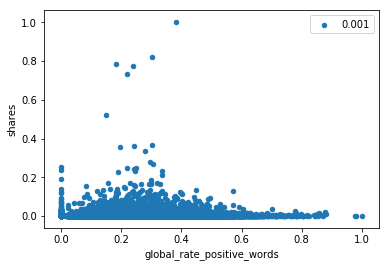

In [659]:
df_norm.plot(kind='scatter', x='global_rate_positive_words', y='shares', label="%.3f" % df_norm[['global_rate_positive_words', 'shares']].corr().as_matrix()[0,1])
#df.plot(kind='scatter', x='Floor', y='RentalPrice', label="%.3f" % df[['Floor', 'RentalPrice']].corr().as_matrix()[0,1])
#df.plot(kind='scatter', x='BroadbandRate', y='RentalPrice', label="%.3f" % df[['BroadbandRate', 'RentalPrice']].corr().as_matrix()[0,1])

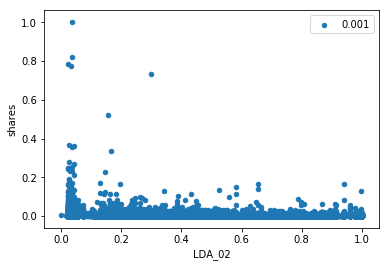

In [1021]:
df_norm.plot(kind='scatter', x='LDA_02', y='shares', label="%.3f" % df_norm[['global_rate_positive_words', 'shares']].corr().as_matrix()[0,1])
#df.plot(kind='scatter', x='Floor', y='RentalPrice', label="%.3f" % df[['Floor', 'RentalPrice']].corr().as_matrix()[0,1])
#df.plot(kind='scatter', x='BroadbandRate', y='RentalPrice', label="%.3f" % df[['BroadbandRate', 'RentalPrice']].corr().as_matrix()[0,1])

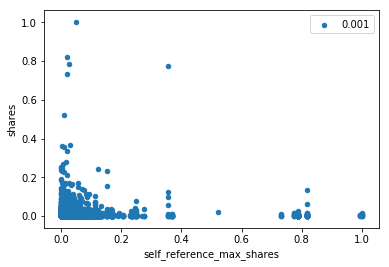

In [1022]:
df_norm.plot(kind='scatter', x='self_reference_max_shares', y='shares', label="%.3f" % df_norm[['global_rate_positive_words', 'shares']].corr().as_matrix()[0,1])
#df.plot(kind='scatter', x='Floor', y='RentalPrice', label="%.3f" % df[['Floor', 'RentalPrice']].corr().as_matrix()[0,1])
#df.plot(kind='scatter', x='BroadbandRate', y='RentalPrice', label="%.3f" % df[['BroadbandRate', 'RentalPrice']].corr().as_matrix()[0,1])

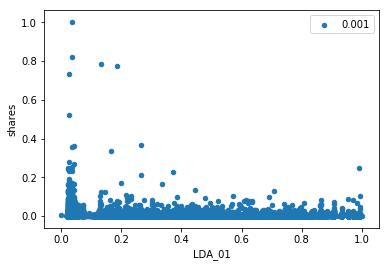

In [1024]:
df_norm.plot(kind='scatter', x='LDA_01', y='shares', label="%.3f" % df_norm[['global_rate_positive_words', 'shares']].corr().as_matrix()[0,1])
#df.plot(kind='scatter', x='Floor', y='RentalPrice', label="%.3f" % df[['Floor', 'RentalPrice']].corr().as_matrix()[0,1])
#df.plot(kind='scatter', x='BroadbandRate', y='RentalPrice', label="%.3f" % df[['BroadbandRate', 'RentalPrice']].corr().as_matrix()[0,1])

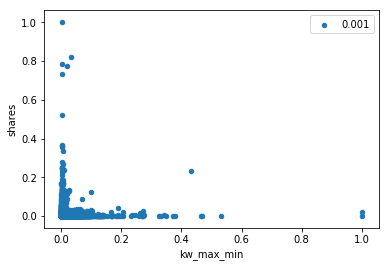

In [1025]:
df_norm.plot(kind='scatter', x='kw_max_min', y='shares', label="%.3f" % df_norm[['global_rate_positive_words', 'shares']].corr().as_matrix()[0,1])
#df.plot(kind='scatter', x='Floor', y='RentalPrice', label="%.3f" % df[['Floor', 'RentalPrice']].corr().as_matrix()[0,1])
#df.plot(kind='scatter', x='BroadbandRate', y='RentalPrice', label="%.3f" % df[['BroadbandRate', 'RentalPrice']].corr().as_matrix()[0,1])

In [1026]:
df_norm.shape

(39644, 60)

In [665]:
df_train_norm=df_norm.head(a)
df_train_norm.shape

(27750, 60)

In [666]:
df_test_norm=df_norm.head(b)
df_test_norm.shape

(11894, 60)

In [1008]:
#Train a model with all the normalised features
lm_norm= sm.ols(formula="shares ~  LDA_00 + LDA_01 + LDA_02 + LDA_03 + LDA_04 + average_token_length + avg_negative_polarity + avg_positive_polarity +  global_rate_positive_words + global_sentiment_polarity + global_subjectivity + kw_avg_avg + kw_avg_max + kw_avg_min + kw_max_avg + kw_max_min  + n_non_stop_unique_tokens + n_non_stop_words + n_tokens_content + n_unique_tokens ", data=df_train_norm).fit()
print(lm_norm.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     25.78
Date:                Mon, 30 Apr 2018   Prob (F-statistic):           1.36e-95
Time:                        00:41:59   Log-Likelihood:                 80490.
No. Observations:               27750   AIC:                        -1.609e+05
Df Residuals:                   27729   BIC:                        -1.608e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

# Evaluating the model on train data

In [668]:
predictions_train_norm = lm_norm.predict(df_train_norm)
predictions_train_norm.head(5)


22087    0.004593
9849     0.003266
28004    0.003056
30837    0.004340
22399    0.005759
dtype: float64

In [669]:
predictions_train_norm.describe()

count    27750.000000
mean         0.004007
std          0.001815
min         -0.000883
25%          0.002737
50%          0.003672
75%          0.004941
max          0.032094
dtype: float64

In [670]:
predictions_train_norm = predictions_train_norm.apply(lambda res: 1 if res > predictions_train_norm.mean()  else 0)
predictions_train_norm.value_counts()

0    16109
1    11641
dtype: int64

In [671]:
df_train_norm['shares_binary'] = np.where(df_train_norm['shares'] >=df_train_norm['shares'].mean(), 1, 0)
df_train_norm['shares_binary'].value_counts()

C:\Users\anjal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    22040
1     5710
Name: shares_binary, dtype: int64

In [672]:

# Prepare the descriptive features
x_norm = predictions_train_norm
y_norm = df_train_norm.shares_binary
print("Descriptive features:\n", x_norm.head(4))
print("\nTarget feature:\n", y_norm.head(4))

Descriptive features:
 22087    1
9849     0
28004    0
30837    1
dtype: int64

Target feature:
 22087    0
9849     0
28004    0
30837    1
Name: shares_binary, dtype: int32


In [673]:
# Some more evaluation metrics for train data
print("Accuracy: ", metrics.accuracy_score(y_norm, x_norm))
print("Confusion matrix: \n", metrics.confusion_matrix(y_norm, x_norm))
print("Classification report:\n ", metrics.classification_report(y_norm, x_norm))

Accuracy:  0.6236036036036036
Confusion matrix: 
 [[13852  8188]
 [ 2257  3453]]
Classification report:
               precision    recall  f1-score   support

          0       0.86      0.63      0.73     22040
          1       0.30      0.60      0.40      5710

avg / total       0.74      0.62      0.66     27750



## Evaluating the model on test data

In [674]:
predictions_test_norm = lm_norm.predict(df_test_norm)
predictions_test_norm.head(5)


22087    0.004593
9849     0.003266
28004    0.003056
30837    0.004340
22399    0.005759
dtype: float64

In [675]:
predictions_test_norm.describe()

count    11894.000000
mean         0.004018
std          0.001802
min         -0.000883
25%          0.002762
50%          0.003688
75%          0.004940
max          0.026717
dtype: float64

In [676]:
predictions_test_norm = predictions_test_norm.apply(lambda res: 1 if res > predictions_test_norm.mean()  else 0)
predictions_test_norm.value_counts()

0    6861
1    5033
dtype: int64

In [677]:
df_test_norm['shares_binary'] = np.where(df_test_norm['shares'] >=df_test_norm['shares'].mean(), 1, 0)
df_test_norm['shares_binary'].value_counts()

C:\Users\anjal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    9408
1    2486
Name: shares_binary, dtype: int64

In [678]:

# Prepare the descriptive features
x_norm = predictions_test_norm
y_norm = df_test_norm.shares_binary
print("Descriptive features:\n", x_norm.head(4))
print("\nTarget feature:\n", y_norm.head(4))

Descriptive features:
 22087    1
9849     0
28004    0
30837    1
dtype: int64

Target feature:
 22087    0
9849     0
28004    0
30837    1
Name: shares_binary, dtype: int32


In [679]:
# Some more evaluation metrics for test data
print("Accuracy: ", metrics.accuracy_score(y_norm, x_norm))
print("Confusion matrix: \n", metrics.confusion_matrix(y_norm, x_norm))
print("Classification report:\n ", metrics.classification_report(y_norm, x_norm))

Accuracy:  0.6212375987893055
Confusion matrix: 
 [[5882 3526]
 [ 979 1507]]
Classification report:
               precision    recall  f1-score   support

          0       0.86      0.63      0.72      9408
          1       0.30      0.61      0.40      2486

avg / total       0.74      0.62      0.66     11894



# Data Standardization

In [1009]:
# Trying standardisation of features, instead of range normalisation.
df_st = (df_cont - df_cont.mean()) / df_cont.std()
df_st.head(10)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
22087,-0.277967,-0.188620,-0.542370,0.010384,0.000675,0.031704,-0.166227,0.183226,-0.306175,-0.304264,0.294896,1.454187,4.229260,-0.465353,-0.432942,-0.249484,-0.476905,-0.519560,-0.389280,-0.176245,-0.132503,-0.234752,0.424126,-0.642195,-0.982144,0.204095,0.438508,-0.050599,-0.178641,-0.140500,-0.449386,-0.478658,2.081338,-0.473755,-0.409822,-0.256817,-0.272319,-0.388113,2.407391,-0.088065,-0.695742,-0.690062,-0.739008,0.321929,-0.354217,-0.301835,0.370014,-0.300464,0.557561,0.112692,-0.870957,0.174637,-0.077669,0.075593,-0.183488,-0.870796,-0.269073,0.837738,-0.689649,-0.227693
9849,0.889364,1.230466,-0.302510,0.000327,0.000675,-0.011181,0.539737,-0.335562,-0.426520,-0.304264,0.567249,-0.117209,-0.236442,-0.465353,-0.432942,-0.249484,-0.476905,1.924658,-0.317475,-0.262041,-0.388350,-0.008836,0.424126,-0.199821,0.220930,-0.385932,-0.688937,-0.160130,-0.231337,-0.229797,-0.449386,-0.478658,-0.480448,-0.473755,2.440024,-0.256817,-0.272319,-0.388113,-0.593317,-0.512883,2.372504,-0.661261,-0.710468,-0.279835,-0.912817,-1.421415,-0.848407,-0.081404,0.290734,-1.919255,0.063864,-2.045023,-1.447792,-0.498547,-0.620369,-0.870796,-0.269073,0.837738,-0.689649,-0.228812
28004,-0.758907,-1.134677,-0.378926,-0.032659,0.000675,-0.048597,-0.519209,0.442620,-0.306175,-0.304264,-0.494791,-1.164806,-0.236442,-0.465353,-0.432942,-0.249484,2.096799,-0.519560,-0.389280,-0.074897,-0.134615,-0.112309,0.424126,1.330978,0.779681,-0.345625,-0.303173,-0.136724,0.087034,0.049493,2.225204,-0.478658,-0.480448,-0.473755,-0.409822,-0.256817,-0.272319,-0.388113,-0.549856,-0.460849,-0.624926,-0.622545,2.095433,0.063061,0.512317,0.377012,-0.279389,0.476204,-0.388463,-0.484537,0.063864,0.981786,0.906583,1.109044,0.378217,0.054424,-0.269073,-0.751322,-0.689649,-0.145815
30837,-0.969027,1.703495,-0.228217,0.007624,0.000675,0.033201,-0.607455,-0.335562,-0.426520,-0.304264,0.262542,-0.117209,-0.236442,2.148853,-0.432942,-0.249484,-0.476905,-0.519560,-0.389280,-0.013984,-0.062955,0.001512,0.424126,0.000980,1.738694,-0.060826,0.776040,0.288836,0.282025,0.388178,-0.449386,-0.478658,-0.480448,2.110742,-0.409822,-0.256817,-0.272319,-0.388113,-0.593306,2.754187,-0.665429,-0.660721,-0.229194,0.319755,0.216002,0.863226,0.990297,-0.081404,0.290734,1.000884,0.063864,0.981786,-0.598067,-0.785617,0.078641,0.054424,0.107646,-0.751322,-0.247747,0.507839
22399,-0.305983,1.230466,-0.389539,0.013601,0.000675,0.019308,-0.872192,-0.854350,-0.546866,-0.060828,0.013014,-0.641007,-0.236442,-0.465353,2.309718,-0.249484,-0.476905,-0.519560,-0.389280,0.115617,0.295866,-0.234752,0.424126,0.923015,-0.982144,2.415166,2.005859,-0.202585,-0.251763,-0.264409,-0.449386,2.089123,-0.480448,-0.473755,-0.409822,-0.256817,-0.272319,-0.388113,1.329639,-0.491186,-0.648470,-0.079070,-0.122468,0.562803,0.982511,0.887710,-0.516526,0.794837,-0.776576,-0.010914,-0.870957,-0.228938,0.179424,0.075593,0.378217,0.531052,0.244634,-1.569929,-0.087055,0.008998
29327,-0.856963,3.122

In [687]:
df_train_st=df_st.head(a)

In [688]:
df_test_st=df_st.head(b)

In [1010]:
#Train a model 
lm_st= sm.ols(formula="shares ~  LDA_00 + LDA_01 + LDA_02 + LDA_03 + LDA_04 + average_token_length + avg_negative_polarity + avg_positive_polarity +  global_rate_positive_words + global_sentiment_polarity + global_subjectivity + kw_avg_avg + kw_avg_max + kw_avg_min + kw_max_avg + kw_max_min  + n_non_stop_unique_tokens + n_non_stop_words + n_tokens_content + n_unique_tokens ", data=df_train_st).fit()
print(lm_st.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     25.78
Date:                Mon, 30 Apr 2018   Prob (F-statistic):           1.36e-95
Time:                        00:44:32   Log-Likelihood:                -38391.
No. Observations:               27750   AIC:                         7.682e+04
Df Residuals:                   27729   BIC:                         7.700e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

# Evaluating the model on train data

In [692]:
predictions_train_st = lm_st.predict(df_train_st)
predictions_train_st.head(5)


22087    0.041202
9849    -0.055026
28004   -0.070325
30837    0.022873
22399    0.125741
dtype: float64

In [693]:
predictions_train_st.describe()

count    27750.000000
mean        -0.001293
std          0.131623
min         -0.355956
25%         -0.093411
50%         -0.025630
75%          0.066461
max          2.035796
dtype: float64

In [694]:
predictions_train_st = predictions_train_st.apply(lambda res: 1 if res > predictions_train_st.mean()  else 0)
predictions_train_st.value_counts()

0    16109
1    11641
dtype: int64

In [695]:
df_train_st['shares_binary'] = np.where(df_train_st['shares'] >=df_train_st['shares'].mean(), 1, 0)
df_train_st['shares_binary'].value_counts()

C:\Users\anjal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    22040
1     5710
Name: shares_binary, dtype: int64

In [705]:
# Prepare the descriptive features
x_st = predictions_test_st
y_st = df_test_st.shares_binary
print("Descriptive features:\n", x_st.head(4))
print("\nTarget feature:\n", y_st.head(4))

Descriptive features:
 22087    1
9849     0
28004    0
30837    1
dtype: int64

Target feature:
 22087    0
9849     0
28004    0
30837    1
Name: shares_binary, dtype: int32


In [706]:
# Some more evaluation metrics for train data
print("Accuracy: ", metrics.accuracy_score(y_st, x_st))
print("Confusion matrix: \n", metrics.confusion_matrix(y_st, x_st))
print("Classification report:\n ", metrics.classification_report(y_st, x_st))

Accuracy:  0.6212375987893055
Confusion matrix: 
 [[5882 3526]
 [ 979 1507]]
Classification report:
               precision    recall  f1-score   support

          0       0.86      0.63      0.72      9408
          1       0.30      0.61      0.40      2486

avg / total       0.74      0.62      0.66     11894



# Evaluating the model on test data

In [707]:
predictions_test_st = lm_st.predict(df_test_st)
predictions_test_st.head(5)


22087    0.041202
9849    -0.055026
28004   -0.070325
30837    0.022873
22399    0.125741
dtype: float64

In [708]:
predictions_test_st.describe()

count    11894.000000
mean        -0.000489
std          0.130705
min         -0.355956
25%         -0.091599
50%         -0.024486
75%          0.066346
max          1.645840
dtype: float64

In [709]:
predictions_test_st = predictions_test_st.apply(lambda res: 1 if res > predictions_test_st.mean()  else 0)
predictions_test_st.value_counts()

0    6861
1    5033
dtype: int64

In [710]:
df_test_st['shares_binary'] = np.where(df_test_st['shares'] >=df_test_st['shares'].mean(), 1, 0)
df_test_st['shares_binary'].value_counts()

C:\Users\anjal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    9408
1    2486
Name: shares_binary, dtype: int64

In [713]:
# Prepare the descriptive features
x_st = predictions_test_st
y_st = df_test_st.shares_binary
print("Descriptive features:\n", x_st.head(4))
print("\nTarget feature:\n", y_st.head(4))

Descriptive features:
 22087    1
9849     0
28004    0
30837    1
dtype: int64

Target feature:
 22087    0
9849     0
28004    0
30837    1
Name: shares_binary, dtype: int32


In [1020]:
# Some more evaluation metrics for test data
print("Accuracy: ", metrics.accuracy_score(y_st, x_st))
print("Confusion matrix: \n", metrics.confusion_matrix(y_st, x_st))
print("Classification report:\n ", metrics.classification_report(y_st, x_st))

Accuracy:  0.6212375987893055
Confusion matrix: 
 [[5882 3526]
 [ 979 1507]]
Classification report:
               precision    recall  f1-score   support

          0       0.86      0.63      0.72      9408
          1       0.30      0.61      0.40      2486

avg / total       0.74      0.62      0.66     11894



# Model evaluation: Training versus test error
Evaluating the model quality only on the training data is misleading. This happens due to the fact that more complex models (e.g., more features) can fit the training data better, but do not generalise to new data, since they pick up too many unimportant details from the training data.
The more complexity we add to the model, the lower the training error tends to get, and the higher the test error. This is called over-fitting the data. An example is shown in the picture below.





In [1015]:
#Pair the actual and the predicted values
print(("Actual - Predicted:\n", (df_train.shares - lm2.predict(df_train)).head(5)))
print("\n(Actual - Predicted) squared:\n", ((df_train.shares - lm2.predict(df_train))**2).head(5))

('Actual - Predicted:\n', 8246    -1491.405290
30971    3592.731392
23069   -4490.972075
8805    -2116.383307
9696    -3793.222320
dtype: float64)

(Actual - Predicted) squared:
 8246     2.224290e+06
30971    1.290772e+07
23069    2.016883e+07
8805     4.479078e+06
9696     1.438854e+07
dtype: float64


In [1016]:
# Print the Mean Squared Error of the model on the training set
mse = ((df_train.shares - lm2.predict(df_train))** 2).mean()
print("\nMean Squared Error:\n", mse)


Mean Squared Error:
 109106818.34973353


In [1017]:
# Print the Mean Absolute Error of the model on the training set
mae = abs(df_train.shares - lm2.predict(df_train)).mean()
print("\nMean Absolute Error:\n", mae)


Mean Absolute Error:
 3057.458072787482


In [1018]:
# Print the Mean Squared Error of the model on the test set
mse = ((df_test.shares - lm2.predict(df_test))** 2).mean()
print("\nMean Squared Error:\n", mse)


Mean Squared Error:
 126309806.43748417


In [1019]:
# Print the Mean Absolute Error of the model on the training set
mae = abs(df_test.shares - lm2.predict(df_test)).mean()
print("\nMean Absolute Error:\n", mae)


Mean Absolute Error:
 3159.3925534524687


Report:


To perform the linear regression we started with data preparation and data understanding by dropping unimportant columns. The cleaned dataset is used to evaluate the linear regression model. As the next step, we experimented using different methods to choose appropriate features that impacts the prediction of target shares.

- For that, initially we tried training the model with single feature and tested on test dataset, but results are unsatisfactory.So, as suggested by professor during presentation we tried training the model with all the features which gave adequate results. R-squared value is 0.023 and accuracy while evaluating the train data is around 0.64 and on test data 0.644. We thought of experimenting by setting new threshold value to 75% and evaluated the model which boosted the performance for training model to 0.73 and test model to 0.735.

- We also tested the performance of the model by selecting the features manually. This also gave pretty good results and similar accuracy which is around 0.63 for mean threshold and 0.72 for the 3rd quartile threshold.

- Like wise we considered different features based on algorithm information gain. We chose the features for this iteration of the linear model based on the output of this algorithm. We trained the model and split the dataset into a training set and a test set. Fit the model on the training set, evaluated both on the training and the test set. Interestingly, the accuracy is good which is again 0.63 when threshold is set to mean and 0.73 for the higher threshold level.

- We have decided to experiment using the random forest metrics to inform our linear regression model. Using the feature importance table from the 100 tree model, we selected the top 10 most important features and ran a linear model using these. We were successful in obtaining the good accuracy which is 0.62 for the mean threshold and 0.72 by setting threshold to third quartile.

- We also tried normalizing and standardizing the methods, which gave relatively modest accuracy similar to other models.

- Overall its good practice on evaluating the model using different features and assessing the metrics. We can say among all the feature selection methods, the model trained with all the features gave higher accuracyWe will use these results to compare with our further models.
